In [1]:
import numpy as np

<font size=4>Load dataset</font>

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<font size=4>Train decision tree model depth=10</font>

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

split = 4
split_acc = np.zeros(split)
count = 0
kf = KFold(n_splits=split)

for fold_train, fold_validate in kf.split(X_train):
    X_train_fold, y_train_fold, X_valid_fold, y_valid_fold = X_train[fold_train], y_train[fold_train], X_train[fold_validate], y_train[fold_validate] 
    model = DecisionTreeClassifier(max_depth=10)
    model.fit(X_train_fold, y_train_fold)
    split_acc[count] = model.score(X_valid_fold,y_valid_fold)
    count = count +1

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)


print("Train acc: "+str(model.score(X_train, y_train)))
print("validate acc: "+str(np.mean(split_acc)))
print("Test acc: "+str(model.score(X_test, y_test)))


Train err: 0.902345454545
validate err: 0.846509090909
Test err: 0.8667


<font size=4>Plot some misclassified digits</font>

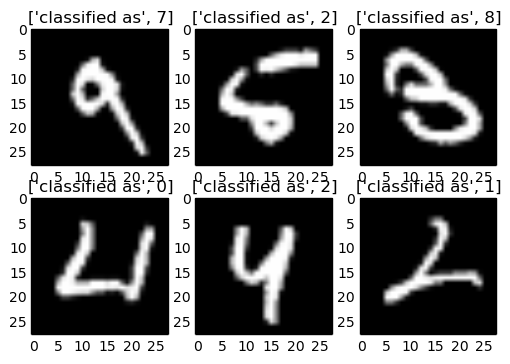

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

count = 0
fig1 = plt.figure()

w = int(np.sqrt(X_train.shape[1]))


for i in range(y_test.shape[0]):
    if count == 6:
        break
    if y_predict[i] != y_test[i] :
        plt.subplot(2,3,count+1)
        plt.imshow(X_test[i].reshape(w,w),cmap='Greys_r')
        plt.title(["classified as", y_predict[i]])
        count = count +1
plt.show()

<font size=4>Plot training error and test error v.s. depth</font>

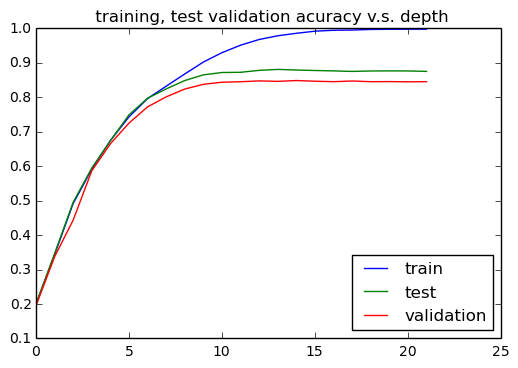

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

fig2 = plt.figure()

train_acc,test_acc,valid_acc = [],[],[]
split = 2
split_acc = np.zeros(split)
kf = KFold(n_splits=split)

for d in range(1,30):
    count = 0
    for fold_train, fold_validate in kf.split(X_train):
        X_train_fold, y_train_fold, X_valid_fold, y_valid_fold = X_train[fold_train], y_train[fold_train], X_train[fold_validate], y_train[fold_validate] 
        model = DecisionTreeClassifier(max_depth=d)
        model.fit(X_train_fold, y_train_fold)
        split_acc[count] = model.score(X_valid_fold,y_valid_fold)
        count = count+1

    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)


    y_predict = model.predict(X_test)
    train_acc.append(model.score(X_train, y_train))
    valid_acc.append(np.mean(split_acc))
    test_acc.append(model.score(X_test, y_test))
    

plt.title(' training, test, validation acuracy v.s. depth')
plt.plot(train_acc,label='train')

plt.plot(test_acc, label='test')
plt.plot(validation,label='validation')

plt.show()